### To predict the movement of stock prices, LSTM model is used. Here, we are only predicting the movement of closing price but the similar approach can be followed for other columns as well.
### The model is trained on the stock prices of AAL company which is then tested on other companies.
### As this is a time series prediction, we are considering the prices of past 60 days to predict the future price. 

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# loading the stock prices of all companies in a dataframe
dataset = pd.read_csv('/content/all_stocks_5yr.csv')

In [ ]:
dataset.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [ ]:
# getting the list of all companies 
companies = dataset.Name.unique()
companies

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [ ]:
# since AAL company is used for training, we are creating a new dataframe with AAL parameters
stock = dataset.loc[dataset['Name'] == 'DIS']
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 170156 to 171414
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [ ]:
stock.head()

,date,open,high,low,close,volume,Name
170156,2013-02-08,54.38,54.72,54.310,54.66,9584224,DIS
170157,2013-02-11,54.65,54.98,54.590,54.75,6358524,DIS
170158,2013-02-12,54.77,55.05,54.690,54.95,8758025,DIS
170159,2013-02-13,55.08,55.30,54.665,54.96,5701775,DIS
170160,2013-02-14,54.92,55.17,54.710,54.88,8564486,DIS


In [ ]:
# creating an array with closing prices
training_set = stock[['close']] 

In [ ]:
training_set.head()

,close
170156,54.66
170157,54.75
170158,54.95
170159,54.96
170160,54.88


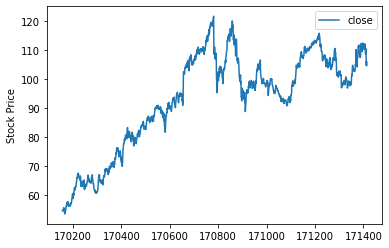

In [ ]:
training_set['close'].plot()
plt.ylabel('Stock Price')
plt.xlabel(None)
plt.legend()
plt.show()

In [ ]:
# normalizing the values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled.shape

(1259, 1)

### In the below cell, we are creating 2 arrays, x_train and y_train.
* x_train stores the values of closing prices of past 365(or as specified in timestamp) days
* y_train stores the values of closing prices of the present day

In [ ]:
x_train = []
y_train = []
timestamp = 365
length = len(training_set)
for i in range(timestamp, length):
    x_train.append(training_set_scaled[i-timestamp:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
print (x_train[0])
print ('\n')
print (y_train[0])

[0.01571219 0.01703377 0.01997063 0.02011747 0.01894273 0.02966226
 0.03142438 0.01483113 0.00851689 0.00969163 0.         0.00455213
 0.01306902 0.01468429 0.02555066 0.03245228 0.04243759 0.04067548
 0.04008811 0.05580029 0.05976505 0.05168869 0.05506608 0.06108664
 0.05859031 0.04757709 0.03994126 0.04919236 0.03994126 0.04684288
 0.03847283 0.04464023 0.04229075 0.04713656 0.04552129 0.05682819
 0.05374449 0.05873715 0.06035242 0.07679883 0.0814978  0.09574156
 0.10220264 0.10220264 0.07767988 0.1051395  0.1041116  0.09397944
 0.11703377 0.1236417  0.13215859 0.1226138  0.12349486 0.1215859
 0.13817915 0.13582966 0.14126285 0.15110132 0.16461087 0.16842878
 0.18325991 0.18208517 0.19207048 0.19985316 0.20161527 0.20381791
 0.20675477 0.18913363 0.1907489  0.18399413 0.17973568 0.17591777
 0.17092511 0.17474302 0.19236417 0.18604993 0.16240822 0.13935389
 0.14992658 0.15800294 0.13994126 0.14023495 0.16534508 0.15036711
 0.14992658 0.13803231 0.15726872 0.14992658 0.16005874 0.17180

In [ ]:
x_train.shape

(894, 365)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(894, 365, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(units = 92, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 92, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 92, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 92, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
28/28 [==============================] - 38s 1s/step - loss: 0.0906
Epoch 2/30
28/28 [==============================] - 30s 1s/step - loss: 0.0114
Epoch 3/30
28/28 [==============================] - 32s 1s/step - loss: 0.0083
Epoch 4/30
28/28 [==============================] - 30s 1s/step - loss: 0.0067
Epoch 5/30
28/28 [==============================] - 30s 1s/step - loss: 0.0063
Epoch 6/30
28/28 [==============================] - 30s 1s/step - loss: 0.0062
Epoch 7/30
28/28 [==============================] - 30s 1s/step - loss: 0.0059
Epoch 8/30
28/28 [==============================] - 30s 1s/step - loss: 0.0053
Epoch 9/30
28/28 [==============================] - 30s 1s/step - loss: 0.0055
Epoch 10/30
28/28 [==============================] - 30s 1s/step - loss: 0.0059
Epoch 11/30
28/28 [==============================] - 30s 1s/step - loss: 0.0050
Epoch 12/30
28/28 [==============================] - 30s 1s/step - loss: 0.0048
Epoch 13/30
28/28 [==============================

### Now the model is trained. We will test the performance of our model by plotting the predicted stock prices and actual stock prices of other companies.

In [ ]:
test_set = dataset.loc[dataset['Name'] == 'DIS']   # change CBS to whatever company from the list
test_set = test_set.loc[:, test_set.columns == 'close']

In [ ]:
# storing the actual stock prices in y_test starting from 60th day as the previous 60 days are used to predict the present day value.
y_test = test_set.iloc[timestamp:, 0:].values

In [ ]:
# storing all values in a variable for generating an input array for our model 
closing_price = test_set.iloc[:, 0:].values
closing_price_scaled = sc.transform(closing_price)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# the model will predict the values on x_test
x_test = [] 
length = len(test_set)

for i in range(timestamp, length):
    x_test.append(closing_price_scaled[i-timestamp:i, 0])
    
x_test = np.array(x_test)
x_test.shape

(894, 365)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(894, 365, 1)

In [ ]:
# predicting the stock price values
y_pred = model.predict(x_test)
predicted_price = sc.inverse_transform(y_pred)

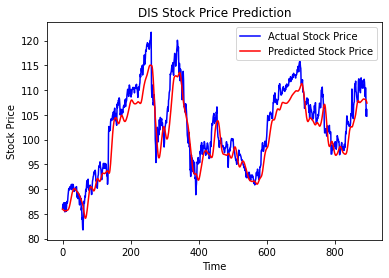

In [ ]:
# plotting the results
plt.plot(y_test, color = 'blue', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.title('DIS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
model.save('StockPrediction.h5')

In [ ]:
# model evaluation
from keras.models import load_model

model = load_model('StockPrediction.h5')

####